# X-ray emission measurements using TEXS (tender X-ray emission spectrometer)

In this notebook, you will use data measured using the in-vacuum tender X-ray emission spectrometer from ID26. A particularity regarding data analyisys, is that the signal of each scan must be reconstructed from the individual signals of the 11 crystal analyzers. Also, the individual signals can present spikes due to cosmic rays, which must be removed. The measurments are for an IrRu(Ti) alloy.

<figure>
  <img src="assets/texs.png" alt="TEXS" style="width:70%">
  <img src="assets/texs_crystal_analyzers.png" alt="TEXS" style="width:37%">
  <figcaption style="text-align: center; font-style: italic">M. Rovezzi et al., J Synchrotron Rad 27, 813 (2020).</figcaption>
</figure>

## Import the required packages and set up logging

In [1]:
%matplotlib notebook

import sys
import logging

import numpy as np
import matplotlib.pyplot as plt

from daxs.measurements import Source, Xes
from daxs.utils import merge_measurements

logging.basicConfig(level=logging.INFO, stream=sys.stdout)
logging.getLogger("daxs").setLevel(logging.INFO)

## Define the data source and create the measurement

In [2]:
filename = "experimental_data/ihma176/id26/Ir47Ru46Ti7_AP/Ir47Ru46Ti7_AP_La_VtC/Ir47Ru46Ti7_AP_La_VtC.h5"
scan_id = "2"
source = Source(filename=filename, inclusions=scan_id)

counters = {
    "x": "xes_en_texs",
    "signal": ["g02", "g03", "g04", "g05", "g06", "g07", "g11", "g12", "g13", "g14"],
    "monitor": "I0t",
}
measurement = Xes(source, counters)

## Plot the data from the individual wires

<IPython.core.display.Javascript object>


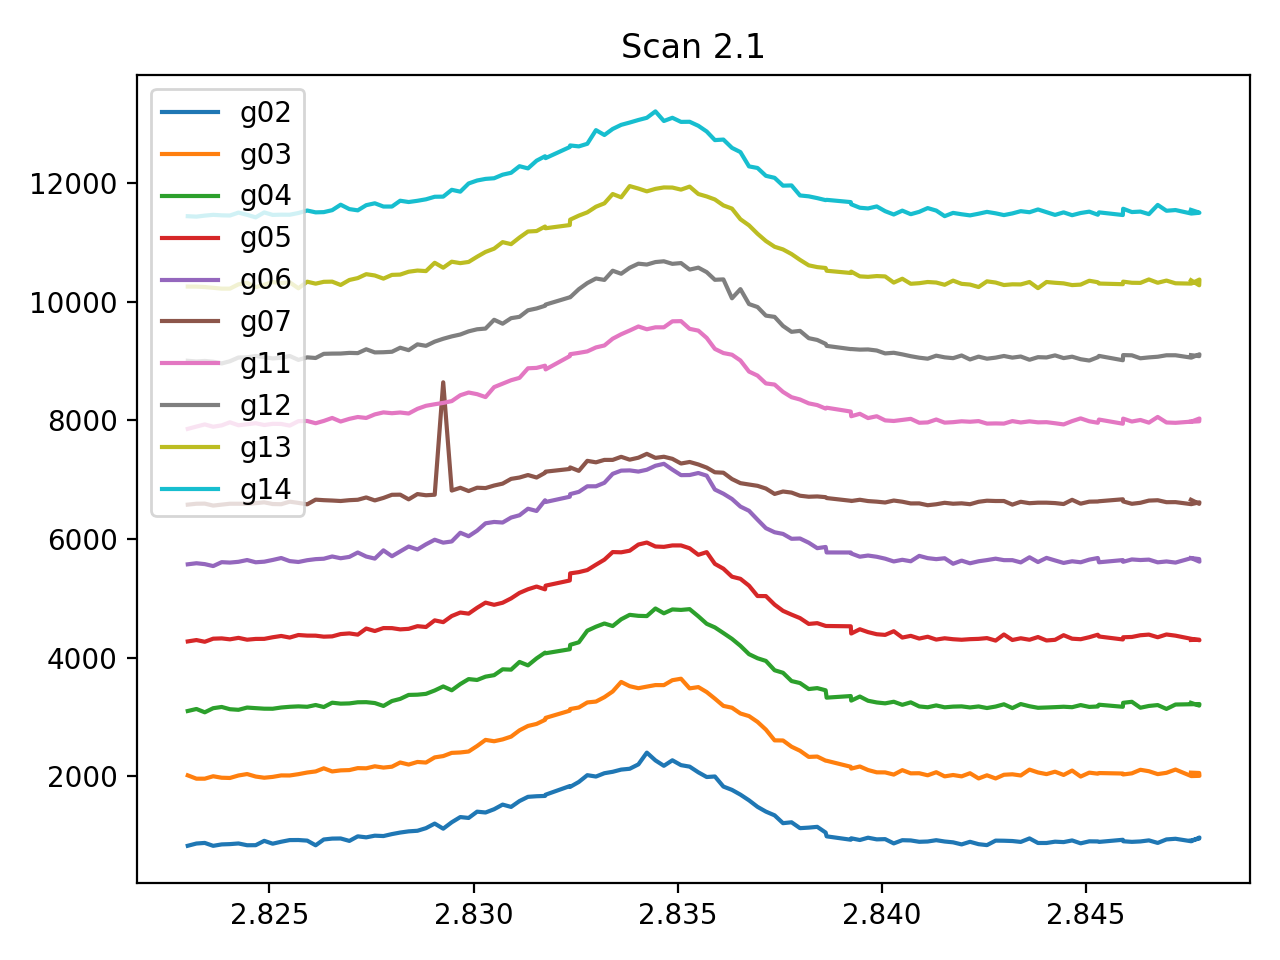

In [3]:
for scan in measurement.scans:
    fig, ax = plt.subplots()
    scan.plot(ax=ax)
    ax.set_title(f"Scan {scan.name}")
    ax.legend()
plt.tight_layout()

## Find the outliers and remove them

<IPython.core.display.Javascript object>


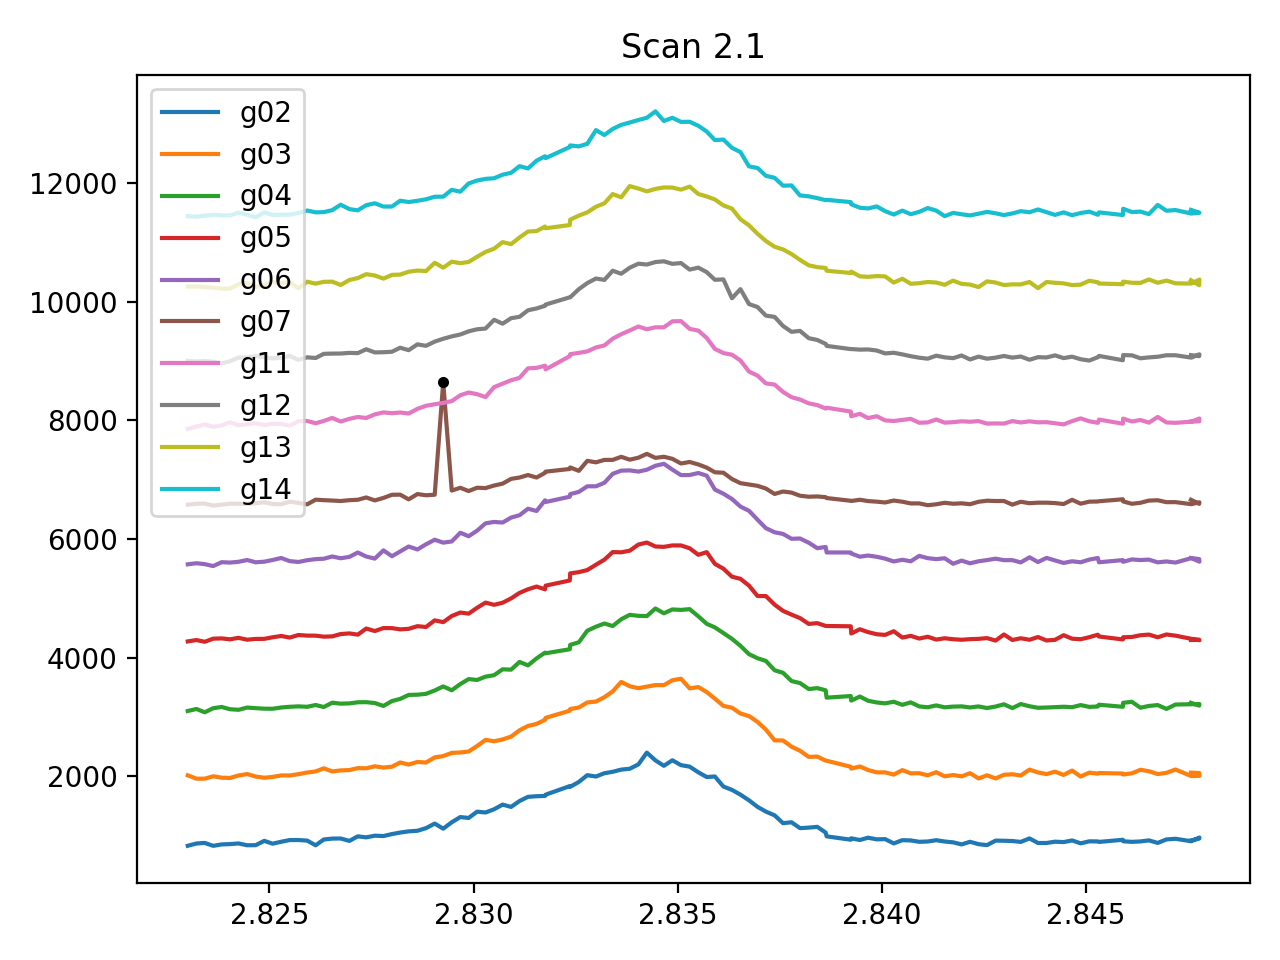

In [4]:
measurement.find_outliers(threshold=3.5, window_size=25)

for scan in measurement.scans:
    fig, ax = plt.subplots()
    scan.plot(ax=ax)
    ax.set_title(f"Scan {scan.name}")
    ax.legend()
    
plt.tight_layout()

## Remove the outliers

Once the optimal parameters for the threshold and size of the sliding window are determined, call the remove_outliers method.

In [5]:
measurement.remove_outliers()

INFO:daxs.measurements:Removing outliers.


<IPython.core.display.Javascript object>


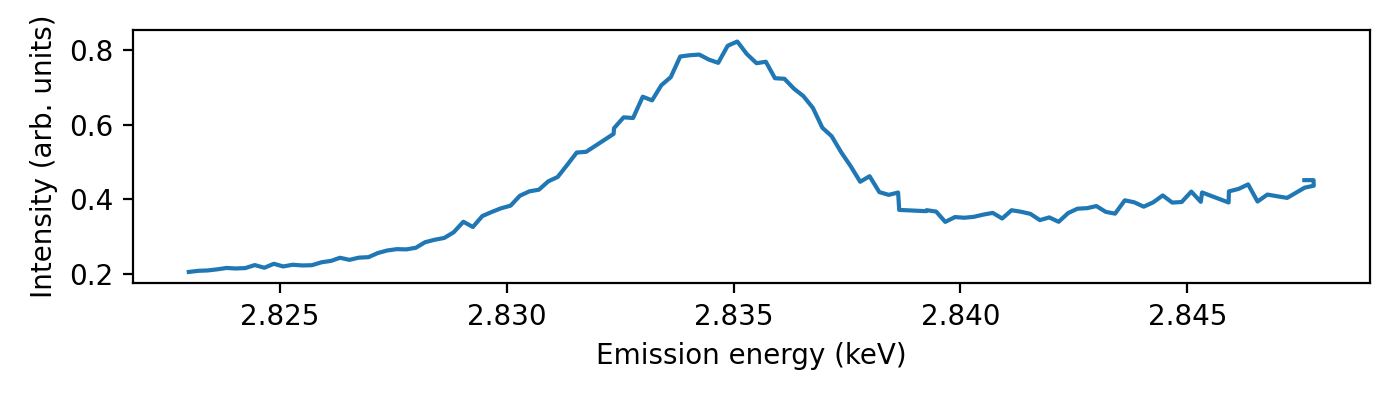

In [6]:
fig, ax = plt.subplots(figsize=(7, 2))
ax.plot(measurement.x, measurement.signal)
ax.set_xlabel("Emission energy (keV)")
ax.set_ylabel("Intensity (arb. units)")
plt.tight_layout()